In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
from hyperopt.mongoexp import MongoTrials
from vastai.api import VastClient
import json
from matplotlib import pyplot as plt
import numpy as np
from git import Repo
import os
import avian_vocalizations
from toolbench.tools import print_module_versions
print_module_versions(globals())

repo = Repo(os.path.join(os.path.dirname(avian_vocalizations.__file__),os.path.pardir))
print("%s@%s"%(repo.active_branch.abspath, repo.head.commit))

             IPython  {'7.9.0'}
            hyperopt  {'0.2.2'}
                json  {'2.0.9'}
          matplotlib  {'3.1.1'}
               numpy  {'1.17.3'}
                 git  {'3.0.4'}
 avian_vocalizations  {'0.0.2'}
           toolbench  {'0.0.1'}
/home/sam/Downloads/avian_vocalizations/.git/refs/heads/master@bd6ef53cb00c9a65a08be1c7b3e2cefa505fc8c1


In [3]:
vast = VastClient().authenticate()
instance = vast.get_running_instances()[0]
instance.wait_until_running()
remote = instance.pb_remote
instance.ssh_connection_command

Initializing vast.ai client with api_key from /home/sam/.vast_api_key.


'ssh root@ssh4.vast.ai -p 24626 -i /home/sam/.ssh/vastai'

In [4]:
tunnel = instance.get_tunnel(27018, 27017)

In [4]:
trials = MongoTrials('mongo://localhost:27018/avian_vocalizations/jobs', 
                     exp_key='alpha1')
trial = trials.best_trial

AllTrialsFailed: 

In [23]:
def plot_trial(trial):
    result = trial['result']
    scores = result['scores']
    print("Experiment %s, Trial %s ObjectId(%s)"%(
        trial['exp_key'], trial['tid'], trial['_id']))
    print("Mean scores: loss: %f \u207A\u2044\u208B %f,  "
          "accuracy: %.2f\ufe6a\u207A\u2044\u208B %.3f\ufe6a"%(
        result['loss'], result['loss_variance']**.5, 
        100*result['accuracy'], 100*result['accuracy_variance']**.5))
    params = json.loads(trials.trial_attachments(trial)['params'])
    print("Training params: \n%s"%params)
    for i in range(len(scores)):
        print("Split %i scores:\n%s"%(i, dict(scores[i])))
        plot_split(i, trial)
        plt.show()
        
def plot_split(i, trial):
    def plot(history, metric, ax=None, title=None, symbol='.', hline=None):
        if ax is None: ax = plt.gca()
        if type(metric) is str: metric = [ metric ]
        for m in metric:
            arr = np.array(history[m])
            masked = np.ma.masked_where( (arr>9999) | (arr<-9999), arr )
            ax.plot(masked, symbol, label=m)
            ax.legend()
            if title: ax.set_title(title)
            ax.set_xlabel('epoch')
            ax.vlines(scores['argmin_loss'], *ax.get_ylim(), colors='m')
            if hline is not None:
                ax.hlines(hline, *ax.get_xlim(), colors='m')
        
        
    scores=trial['result']['scores'][i]
    accuracy = scores['accuracy']
    history=json.loads(trials.trial_attachments(trial)['metrics.split%i'%i])
    fig, (ax0, ax1) = plt.subplots(1,2, figsize=(11,3))
    plt.tight_layout()
    plt.rcParams['lines.linewidth']=1
    
    plot(history, ['accuracy', 'val_accuracy'], ax0, 
         title="Split %i Accuracy"%i,
         hline=scores['accuracy'])

    plot(history, ['loss','val_loss'], ax1, 
         title="Split %i Loss"%i, 
         hline=scores['loss'])
    
    fig.show()

In [24]:
# plot_trial(trials.best_trial)

Experiment alpha1, Trial 117 ObjectId(5dc37f7729aed260ef1279ce)
Mean scores: loss: 2.733713 ⁺⁄₋ 0.289751,  accuracy: 13.30﹪⁺⁄₋ 1.209﹪
Training params: 
{'n_frames': 128, 'dropout_rate': 0.3864954619082316, 'batch_size': 64}
Split 0 scores:
{'loss': 3.0234639644622803, 'accuracy': 0.12087912112474442, 'argmin_loss': 71}


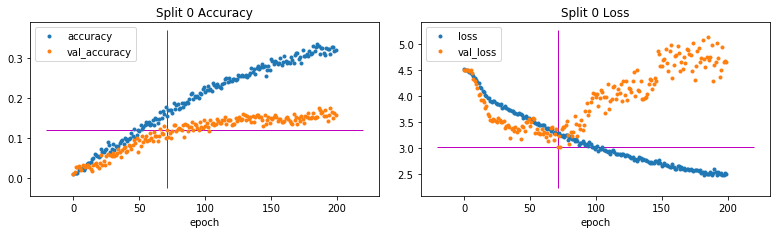

Split 1 scores:
{'loss': 2.443962574005127, 'accuracy': 0.14505495131015778, 'argmin_loss': 174}


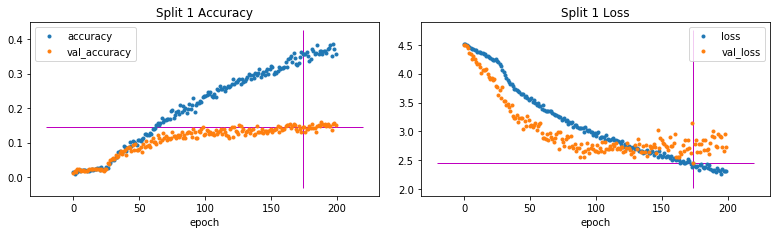

Experiment alpha1, Trial 104 ObjectId(5dc3628a29aed260ef1279af)
Mean scores: loss: 2.818204 ⁺⁄₋ 0.831882,  accuracy: 10.99﹪⁺⁄₋ 7.033﹪
Training params: 
{'n_frames': 128, 'dropout_rate': 0.12510098289494526, 'batch_size': 64}
Split 0 scores:
{'loss': 3.650085687637329, 'accuracy': 0.03956044092774391, 'argmin_loss': 11}


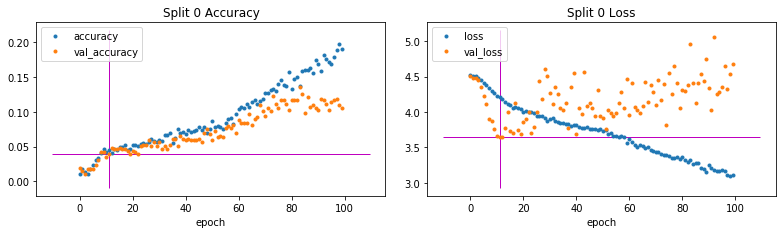

Split 1 scores:
{'loss': 1.9863216876983643, 'accuracy': 0.18021978437900543, 'argmin_loss': 88}


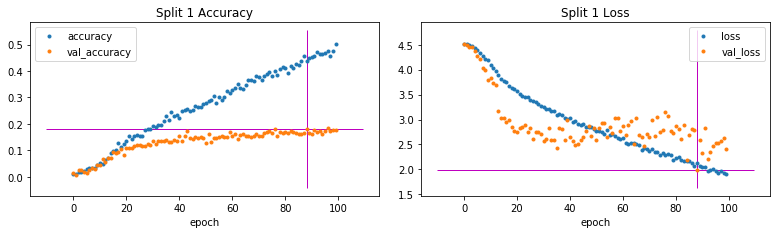

Experiment alpha1, Trial 105 ObjectId(5dc3628c29aed260ef1279b0)
Mean scores: loss: 2.946162 ⁺⁄₋ 0.253520,  accuracy: 12.86﹪⁺⁄₋ 3.407﹪
Training params: 
{'n_frames': 128, 'dropout_rate': 0.3951174569586824, 'batch_size': 64}
Split 0 scores:
{'loss': 3.1996817588806152, 'accuracy': 0.09450549632310867, 'argmin_loss': 94}


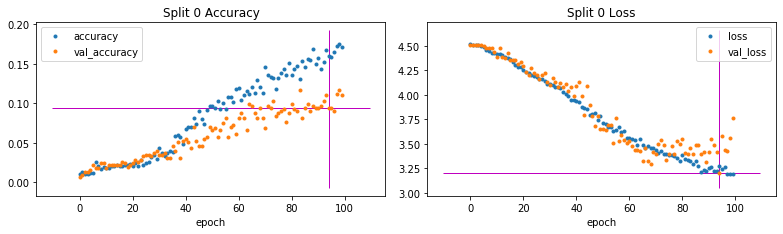

Split 1 scores:
{'loss': 2.6926426887512207, 'accuracy': 0.1626373678445816, 'argmin_loss': 89}


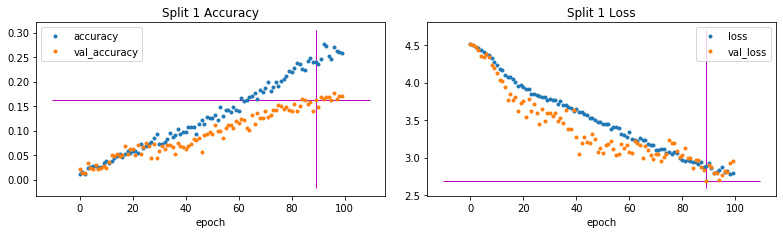

Experiment alpha1, Trial 118 ObjectId(5dc38b8a29aed260ef1279cf)
Mean scores: loss: 2.956478 ⁺⁄₋ 0.173267,  accuracy: 12.31﹪⁺⁄₋ 1.319﹪
Training params: 
{'n_frames': 128, 'dropout_rate': 0.35458892248518664, 'batch_size': 64}
Split 0 scores:
{'loss': 2.7832112312316895, 'accuracy': 0.13626374304294586, 'argmin_loss': 135}


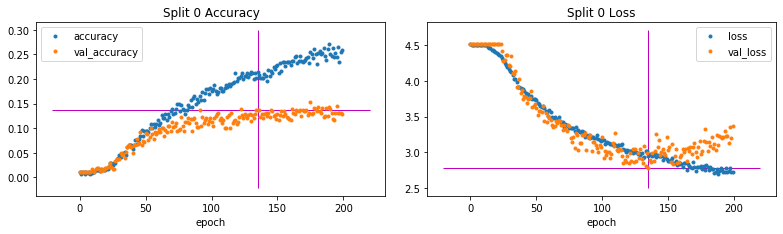

Split 1 scores:
{'loss': 3.129744291305542, 'accuracy': 0.10989011079072952, 'argmin_loss': 197}


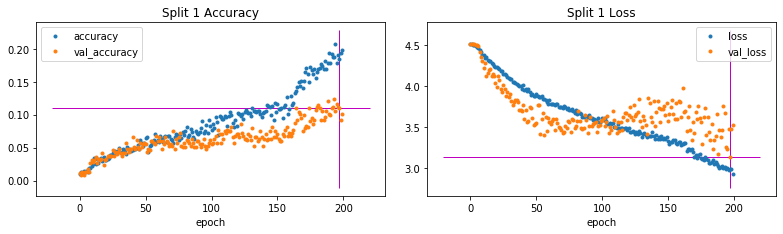

Experiment alpha1, Trial 112 ObjectId(5dc36cab29aed260ef1279c0)
Mean scores: loss: 3.076182 ⁺⁄₋ 0.153673,  accuracy: 12.09﹪⁺⁄₋ 1.099﹪
Training params: 
{'n_frames': 128, 'dropout_rate': 0.33549208125660357, 'batch_size': 64}
Split 0 scores:
{'loss': 3.2298552989959717, 'accuracy': 0.10989011079072952, 'argmin_loss': 64}


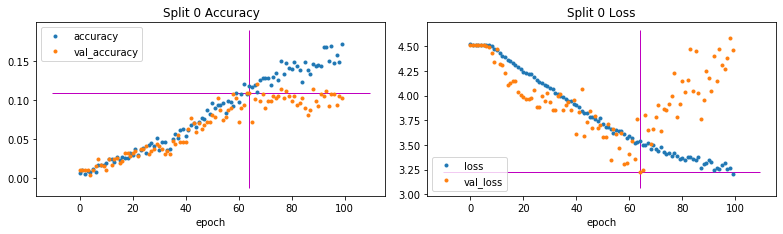

Split 1 scores:
{'loss': 2.922508955001831, 'accuracy': 0.1318681389093399, 'argmin_loss': 76}


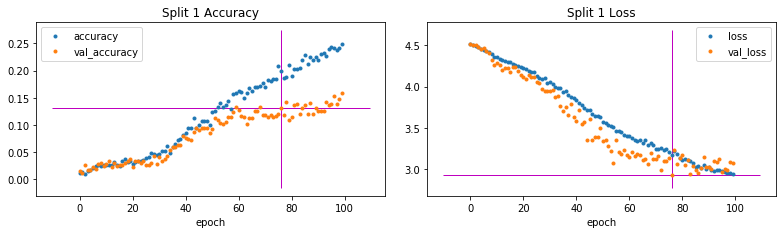

Experiment alpha1, Trial 114 ObjectId(5dc3716929aed260ef1279c5)
Mean scores: loss: 3.214881 ⁺⁄₋ 0.062528,  accuracy: 7.69﹪⁺⁄₋ 2.418﹪
Training params: 
{'n_frames': 128, 'dropout_rate': 0.39183568803400426, 'batch_size': 64}
Split 0 scores:
{'loss': 3.152353048324585, 'accuracy': 0.10109890252351761, 'argmin_loss': 97}


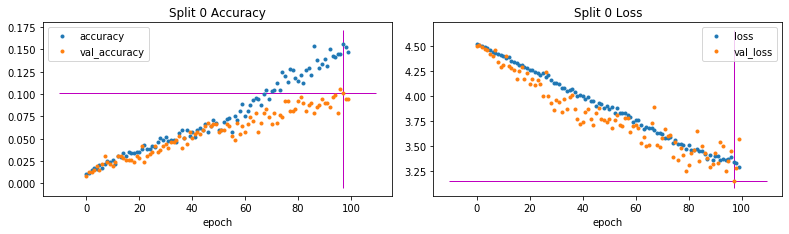

Split 1 scores:
{'loss': 3.277409791946411, 'accuracy': 0.05274725332856178, 'argmin_loss': 99}


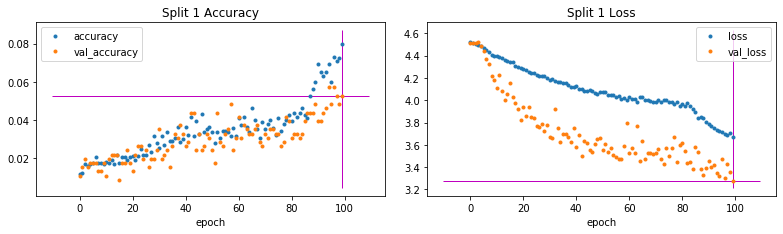

Experiment alpha1, Trial 116 ObjectId(5dc377a529aed260ef1279ca)
Mean scores: loss: 3.236080 ⁺⁄₋ 0.792612,  accuracy: 9.78﹪⁺⁄₋ 7.363﹪
Training params: 
{'n_frames': 128, 'dropout_rate': 0.3263612474169144, 'batch_size': 64}
Split 0 scores:
{'loss': 2.4434685707092285, 'accuracy': 0.17142857611179352, 'argmin_loss': 198}


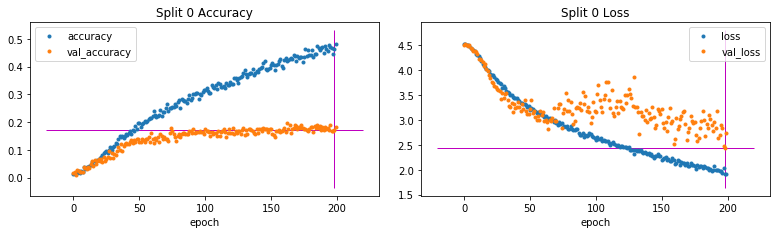

Split 1 scores:
{'loss': 4.028692245483398, 'accuracy': 0.024175824597477913, 'argmin_loss': 142}


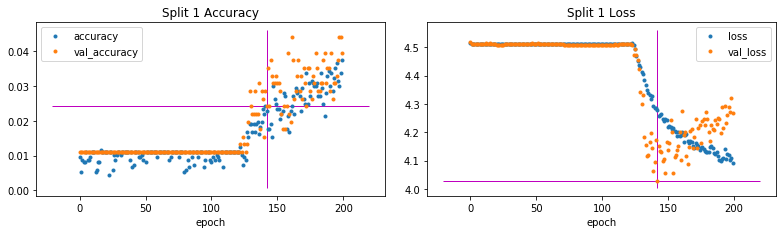

Experiment alpha1, Trial 119 ObjectId(5dc3979e29aed260ef1279d0)
Mean scores: loss: 4.507440 ⁺⁄₋ 0.001771,  accuracy: 1.10﹪⁺⁄₋ 0.000﹪
Training params: 
{'n_frames': 128, 'dropout_rate': 0.47880539018390805, 'batch_size': 64}
Split 0 scores:
{'loss': 4.509210586547852, 'accuracy': 0.010989011265337467, 'argmin_loss': 172}


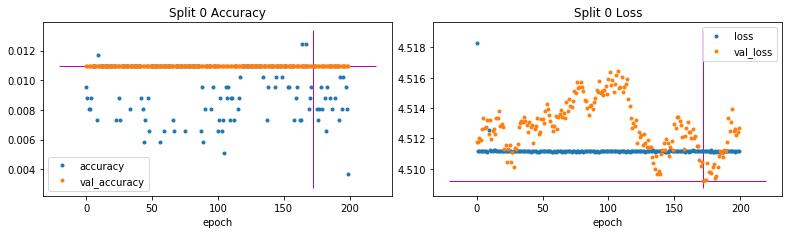

Split 1 scores:
{'loss': 4.505669116973877, 'accuracy': 0.010989011265337467, 'argmin_loss': 89}


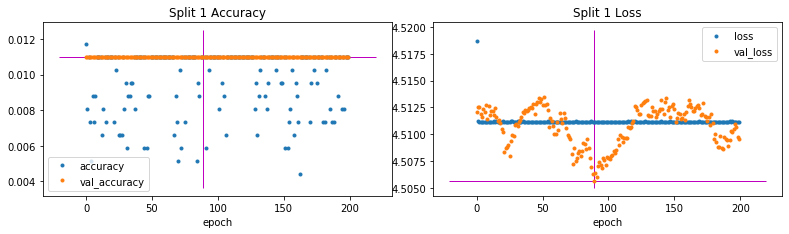

In [26]:
for trial in sorted([t for t in trials.trials if t['result']['status']=='ok'], 
                    key=lambda x: x['result']['loss'], 
                    reverse=False):
    plot_trial(trial)

In [9]:
# trials.delete_all()

## Cleanup

In [10]:
tunnel.close()

In [11]:
# instance.stop()